In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN


from sklearn.datasets import load_iris

In [28]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [29]:
df.shape

(150, 5)

In [30]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [32]:
df.drop('species', axis=1, inplace=True)

In [33]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Text(0.5, 1.0, 'Check outliers')

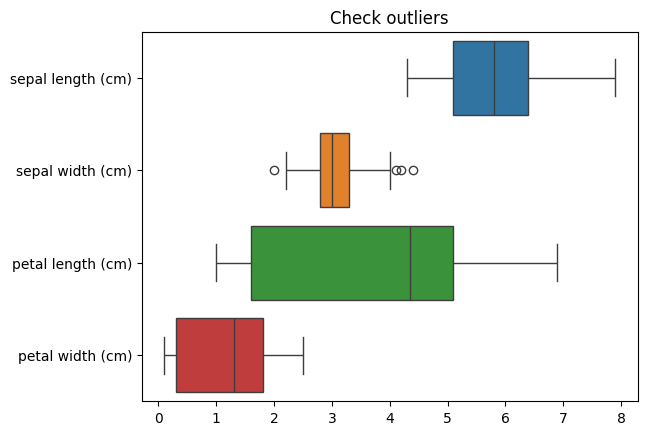

In [34]:
sns.boxplot(data=df, orient='h')
plt.title('Check outliers')

In [57]:
pca = PCA(n_components=2)
pca.fit(df)

PCA(n_components=2)

In [58]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [97]:
df_2d = pca.transform(df)

In [98]:
df_2d.shape

(150, 2)

In [99]:
df_2d

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

<Axes: >

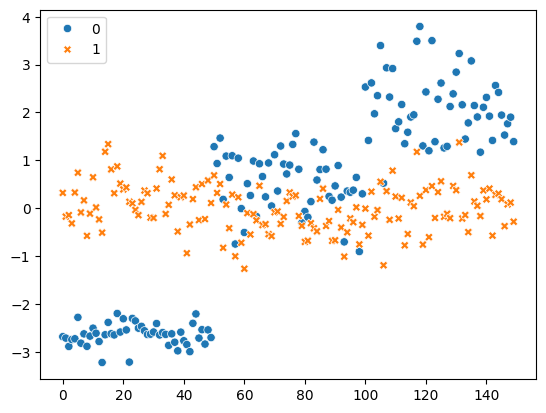

In [100]:
sns.scatterplot(df_2d)

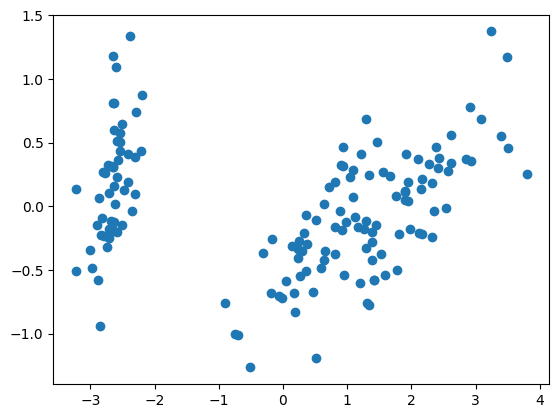

In [104]:
plt.scatter(df_2d[:,0], df_2d[:,1])

In [101]:
k_means = KMeans(n_clusters=3, random_state=0).fit(df_2d)
#k_means.fit(df_2d)

In [102]:
df_clustered = k_means.transform(df_2d)

<Axes: >

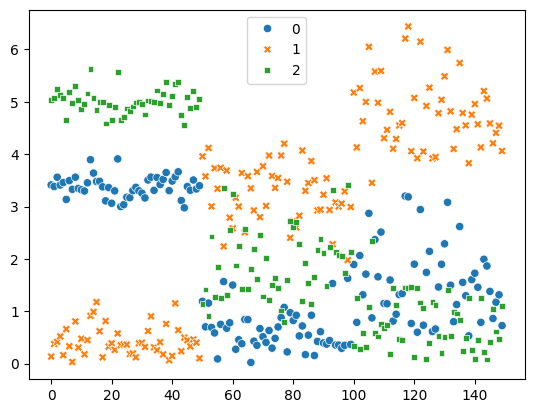

In [103]:
sns.scatterplot(data=df_clustered)

In [85]:
# elobow method implementation start it should be before start k means
distance_list = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i, n_init=100)
    k_means.fit(df_2d)

    distance_list.append(k_means.inertia_)

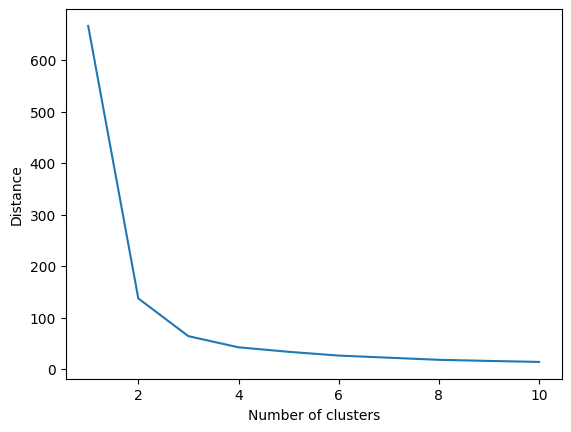

In [86]:
# elbou plotting
plt.plot(range(1,11), distance_list)
plt.xlabel('Number of clusters')
plt.ylabel('Distance')
plt.show()

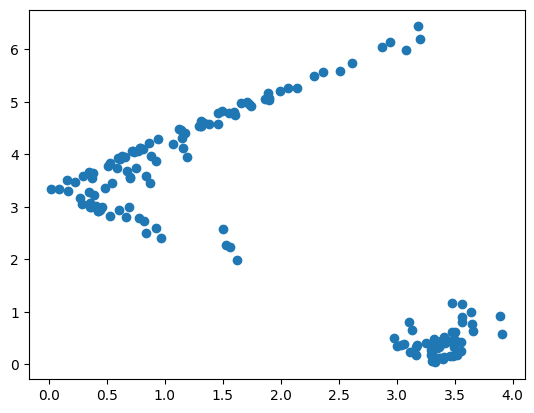

In [90]:
plt.scatter(df_clustered[:,0], df_clustered[:,1])

In [105]:
dbscan = DBSCAN(eps=1, min_samples=4)
dbscan.fit(df_2d)

DBSCAN(eps=1, min_samples=4)

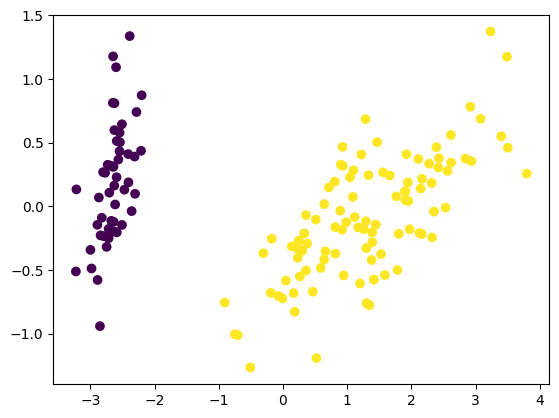

In [106]:
plt.scatter(df_2d[:,0], df_2d[:,1], c=dbscan.labels_)